Music Generation

  In recent years, deep learning has revolutionized various fields, including natural language processing, image recognition, and even music generation. One of the most promising deep learning architectures for sequential data is the Long Short-Term Memory (LSTM) network, a type of Recurrent Neural Network (RNN). LSTMs are particularly well-suited for tasks that involve sequences and time series data, such as speech recognition, language translation, and, as in this project, music generation.

  Our goal is to create a model capable of learning from a dataset of music tracks and generating new, coherent musical sequences. 

  It  utilized a comprehensive dataset of music tracks, which includes a variety of features relevant to music composition and analysis.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from music21 import note, chord, stream
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout # type: ignore
import pygame
import matplotlib.pyplot as plt

In [2]:
dummy_notes = ['C4', 'E4', 'G4', 'C5'] * 100 

note_to_int = {note: number for number, note in enumerate(set(dummy_notes))}
int_to_note = {number: note for note, number in note_to_int.items()}
sequence_length = 10
n_vocab = len(note_to_int)


In [3]:
input_sequences = []
output_sequences = []

for i in range(len(dummy_notes) - sequence_length):
    input_sequences.append([note_to_int[n] for n in dummy_notes[i:i + sequence_length]])
    output_sequences.append(note_to_int[dummy_notes[i + sequence_length]])

RESHAPE THE NORMALIZE INPUT

In [4]:
X = np.reshape(input_sequences, (len(input_sequences), sequence_length, 1))
X = X / float(n_vocab)
y = np.eye(n_vocab)[output_sequences]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BUILD THE LSTM MODEL

In [6]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256))
model.add(Dropout(0.3))
model.add(Dense(n_vocab, activation='softmax'))

COMPILE AND TRAIN THE MODEL

In [7]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
5/5 - 6s - 1s/step - accuracy: 0.2532 - loss: 1.3891 - val_accuracy: 0.2051 - val_loss: 1.3881
Epoch 2/50
5/5 - 0s - 88ms/step - accuracy: 0.2179 - loss: 1.3842 - val_accuracy: 0.5000 - val_loss: 1.3785
Epoch 3/50
5/5 - 0s - 85ms/step - accuracy: 0.2596 - loss: 1.3767 - val_accuracy: 0.2051 - val_loss: 1.3743
Epoch 4/50
5/5 - 0s - 86ms/step - accuracy: 0.2628 - loss: 1.3606 - val_accuracy: 0.2051 - val_loss: 1.3174
Epoch 5/50
5/5 - 0s - 86ms/step - accuracy: 0.5064 - loss: 1.2087 - val_accuracy: 0.5256 - val_loss: 0.9023
Epoch 6/50
5/5 - 0s - 85ms/step - accuracy: 0.5417 - loss: 0.7565 - val_accuracy: 0.5256 - val_loss: 0.5727
Epoch 7/50
5/5 - 0s - 85ms/step - accuracy: 0.7660 - loss: 0.4748 - val_accuracy: 1.0000 - val_loss: 0.2294
Epoch 8/50
5/5 - 0s - 96ms/step - accuracy: 0.9936 - loss: 0.1435 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 9/50
5/5 - 0s - 85ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 10/50
5/5 - 0s - 86ms/st

LOSS AND ACCURACY OF DATA

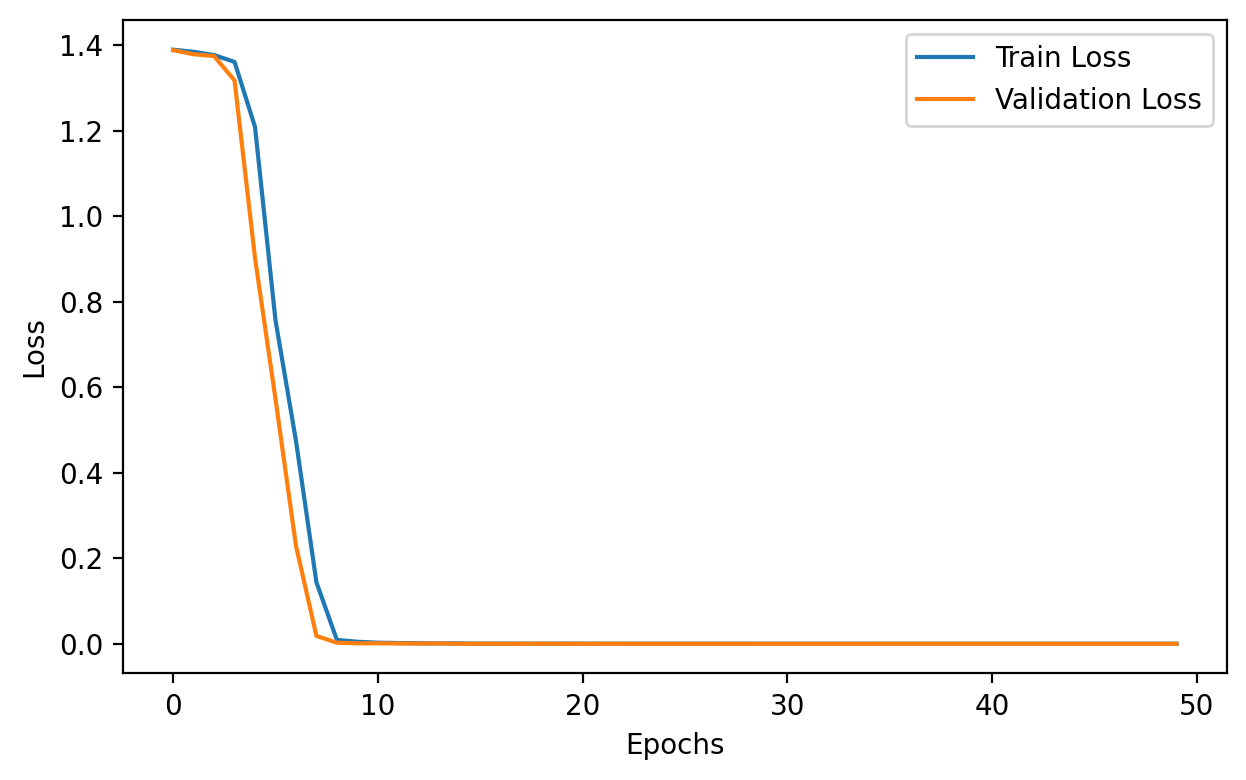

In [8]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

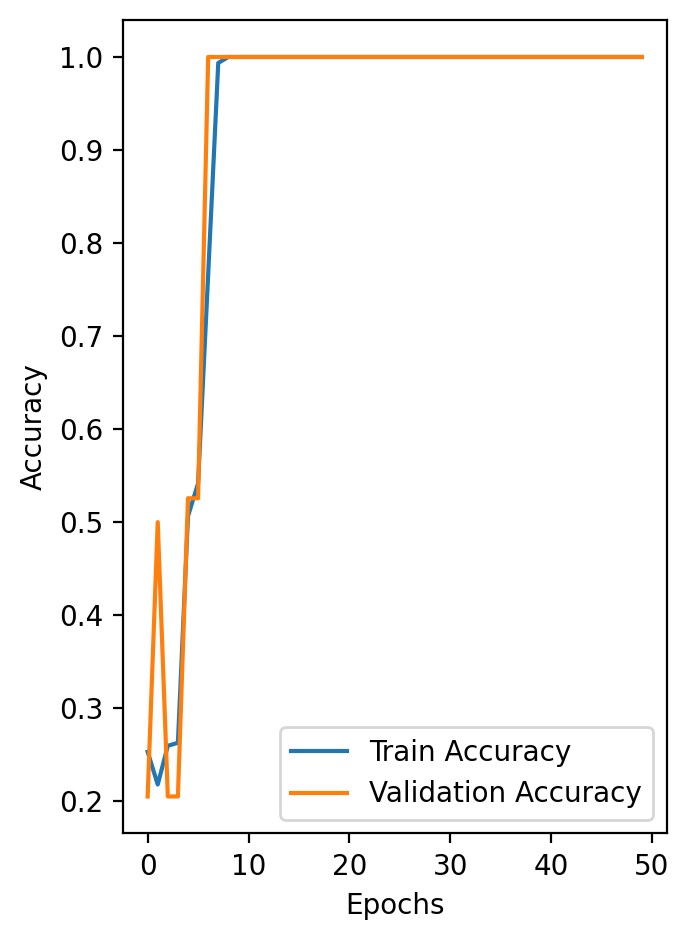

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

FUNCTION TO GENERATE MUSIC

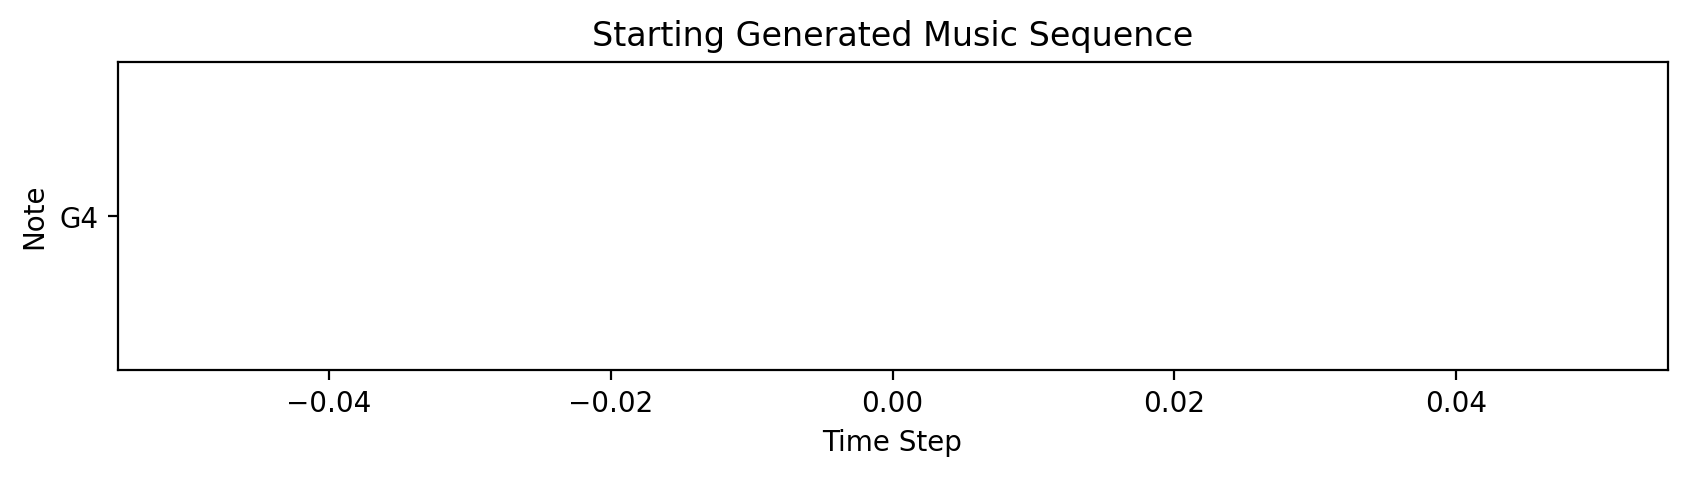

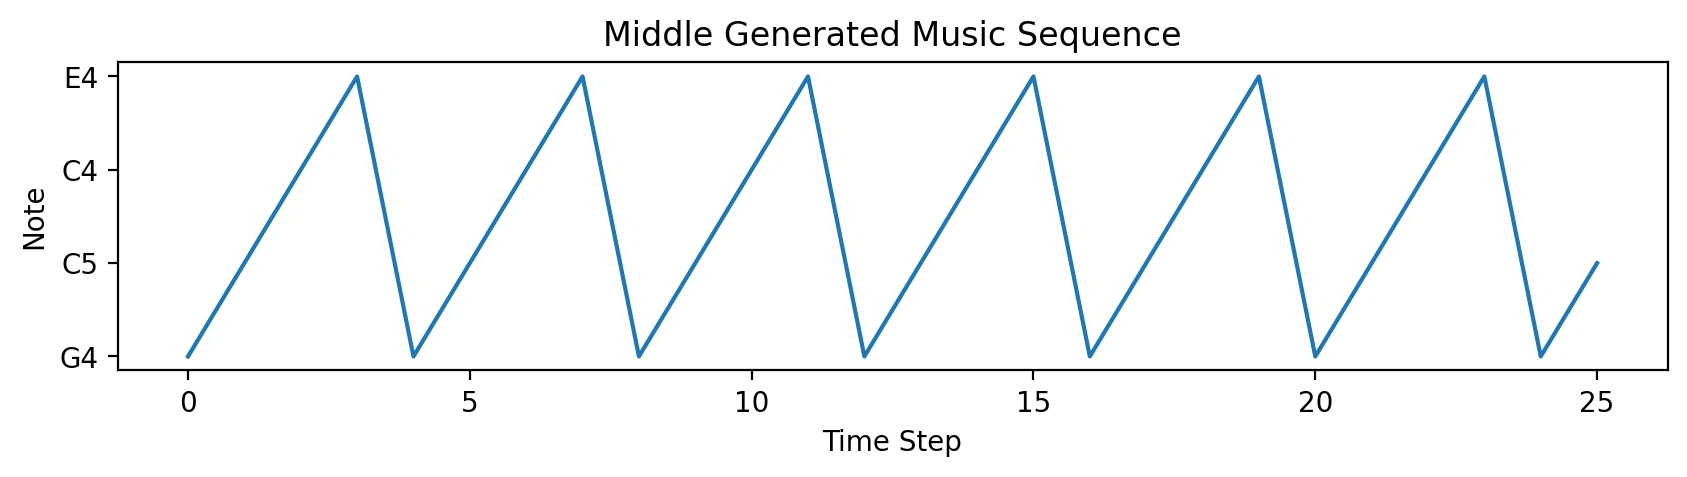

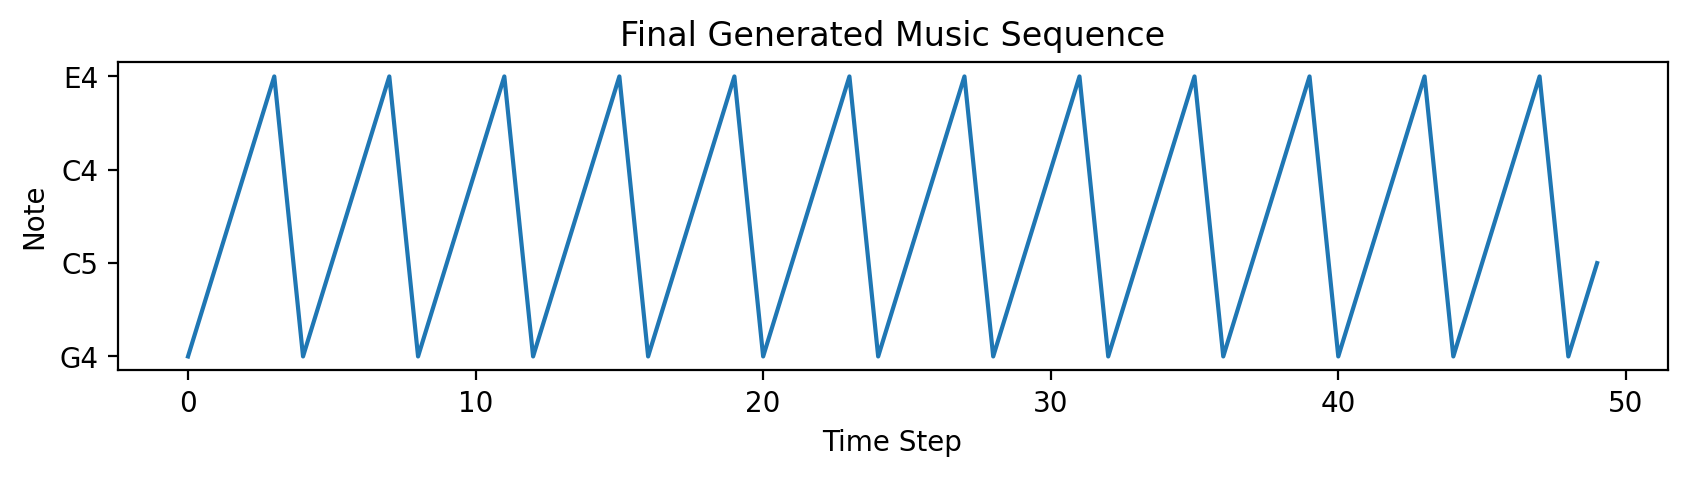

In [10]:
def generate_music_with_visualizations(model, start_sequence, n_vocab, int_to_note, length=50):
    pattern = start_sequence
    prediction_output = []
    
    for note_index in range(length):
        prediction_input = np.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)
        
        prediction = model.predict(prediction_input, verbose=0)
        index = np.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)
        
        pattern.append(index)
        pattern = pattern[1:len(pattern)]
        
        if note_index == 0:  # Visualize the starting sequence
            plt.figure(figsize=(10, 2))
            plt.plot(prediction_output)
            plt.xlabel('Time Step')
            plt.ylabel('Note')
            plt.title('Starting Generated Music Sequence')
            plt.show()
        
        if note_index == length // 2:  # Visualize the middle sequence
            plt.figure(figsize=(10, 2))
            plt.plot(prediction_output)
            plt.xlabel('Time Step')
            plt.ylabel('Note')
            plt.title('Middle Generated Music Sequence')
            plt.show()
    
    return prediction_output

start_sequence = input_sequences[0]
generated_notes = generate_music_with_visualizations(model, start_sequence, n_vocab, int_to_note)

plt.figure(figsize=(10, 2))
plt.plot(generated_notes)
plt.xlabel('Time Step')
plt.ylabel('Note')
plt.title('Final Generated Music Sequence')
plt.show()



CONVERT GENERRATED NOTES TO MIDI

In [11]:
output_notes = []
for pattern in generated_notes:
    new_note = note.Note(pattern)
    output_notes.append(new_note)

midi_stream = stream.Stream(output_notes)
midi_fp = 'generated_music.mid'
midi_stream.write('midi', fp=midi_fp)


'generated_music.mid'

GENERATED MIDI FILE

In [16]:
pygame.mixer.init()
pygame.mixer.music.load(midi_fp)
pygame.mixer.music.play()

while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)

FREQUENCY DISTRIBUTION

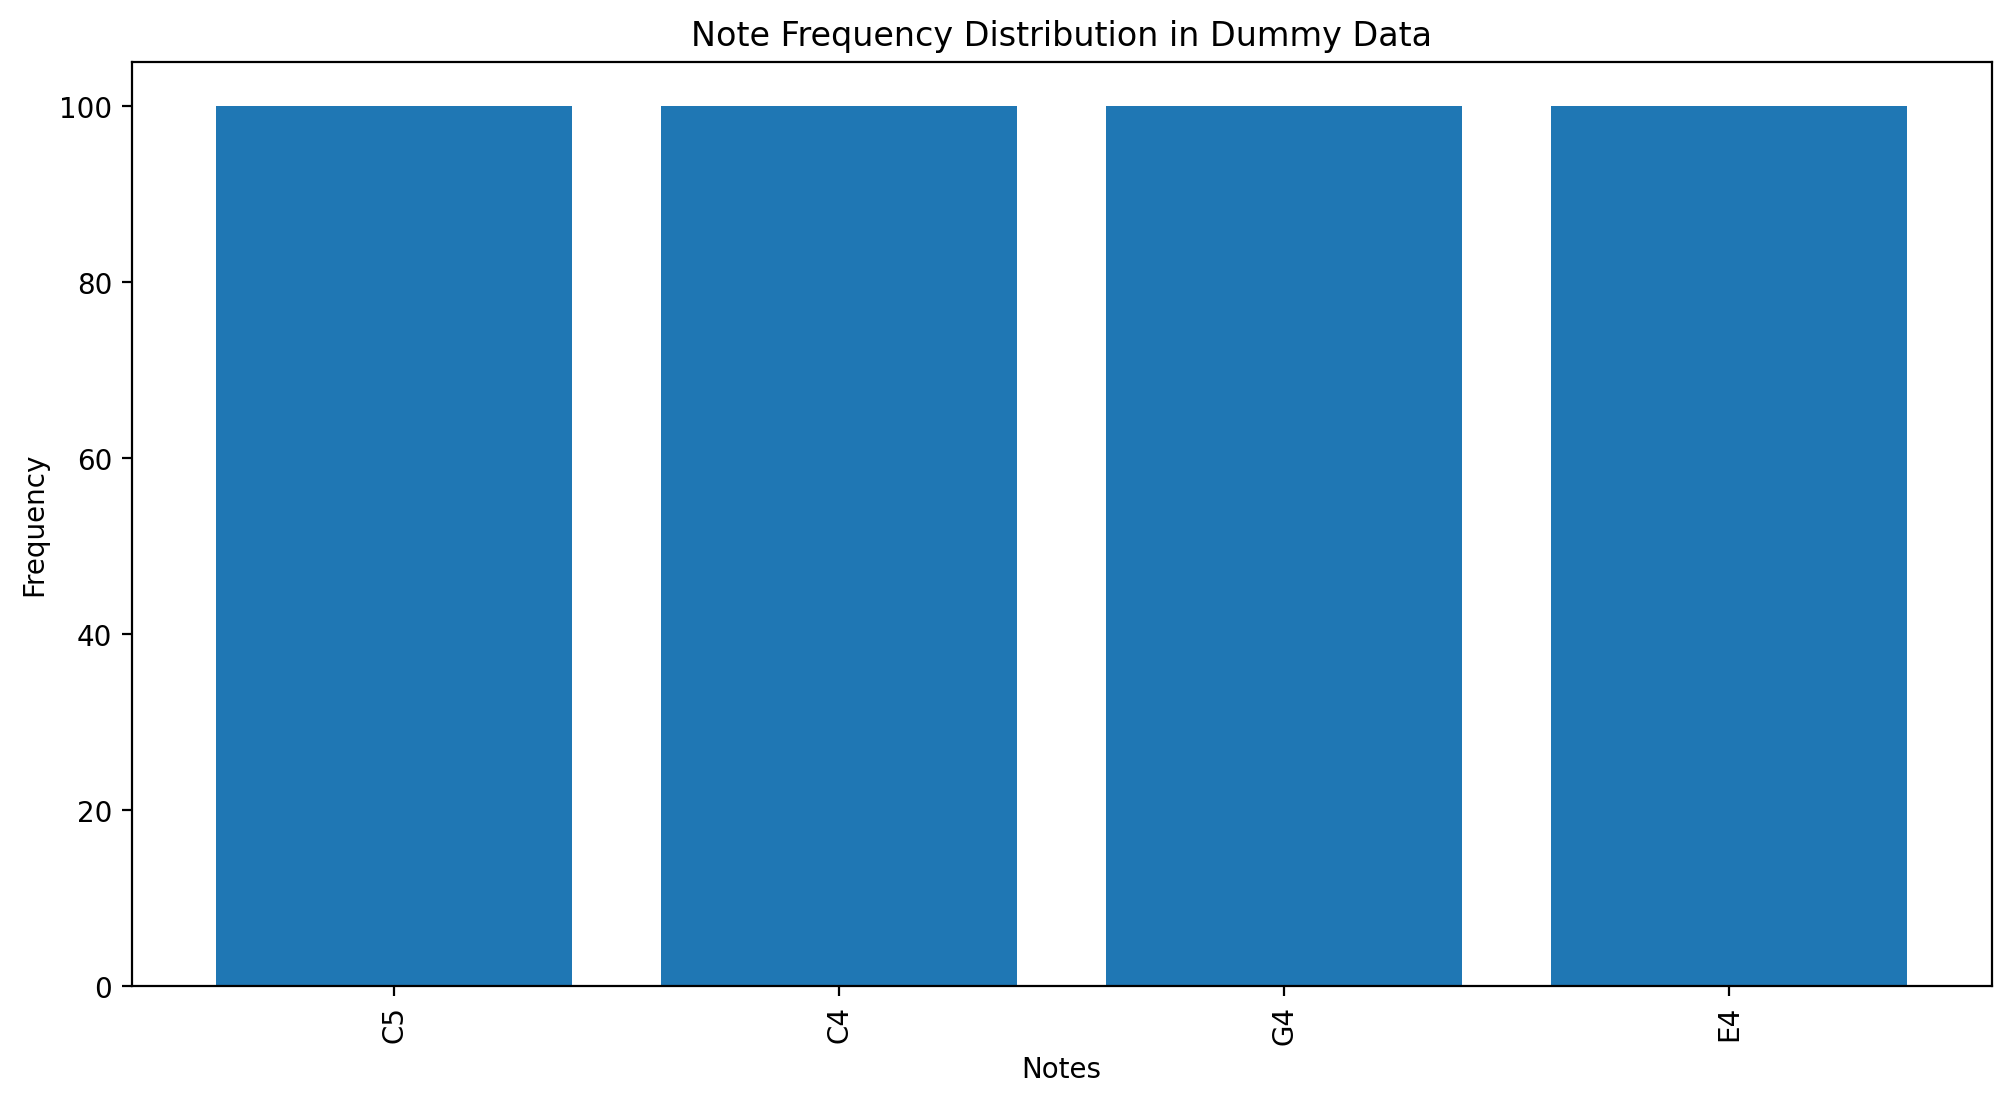

In [13]:
# Plot the note frequency distribution
note_counts = {note: dummy_notes.count(note) for note in set(dummy_notes)}
notes, counts = zip(*note_counts.items())

plt.figure(figsize=(12, 6))
plt.bar(notes, counts)
plt.xlabel('Notes')
plt.ylabel('Frequency')
plt.title('Note Frequency Distribution in Dummy Data')
plt.xticks(rotation=90)
plt.show()